데이콘 _ 학습 플랫폼 이용자 구독 갱신 예측 해커톤: https://dacon.io/competitions/official/236179/overview/description
* 참가 목적 : 
1. 데이콘의 대회 플로우 익히기
2. 현재까지 배운 내용(데이터 전처리/시각화) 이해도 높이기
3. 머신러닝 / 딥러닝 발 담그기

# 데이터 전처리

## 데이터 준비

In [1]:
# 데이터 준비
import pandas as pd

data_info = pd.read_csv('./data_base/data_info.csv')


train = pd.read_csv('./data_base/train.csv')
test = pd.read_csv('./data_base/test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

### 기본적인 정보 확인

In [3]:
# 기본적인 정보 탐색
train.isnull().sum() #결측치 확인


user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

In [4]:
train.describe()  # 요약통계, 수치형 데이터 확인


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [6]:
train.describe(include=['object'])  # 요약통계, 범주형 데이터 확인

,user_id,preferred_difficulty_level,subscription_type
count,10000,10000,10000
unique,10000,3,2
top,b919c29d,Low,Basic
freq,1,4992,5979


### 칼럼 유니크 값 확인

In [8]:
# 각 칼럼에서 어떤 값이 있는지 확인
print('preferred_difficulty_level',train['preferred_difficulty_level'].value_counts())
print('subscription_type',train['subscription_type'].value_counts())
print('payment_pattern',train['payment_pattern'].value_counts())


preferred_difficulty_level preferred_difficulty_level
Low       4992
Medium    3008
High      2000
Name: count, dtype: int64
subscription_type subscription_type
Basic      5979
Premium    4021
Name: count, dtype: int64
payment_pattern payment_pattern
1    1285
7    1284
0    1275
6    1268
5    1238
3    1230
4    1214
2    1206
Name: count, dtype: int64


In [9]:
# train df의 target 칼럼 밸류, 개수 확인
train['target'].value_counts()

target
1    6199
0    3801
Name: count, dtype: int64

## 분포 확인

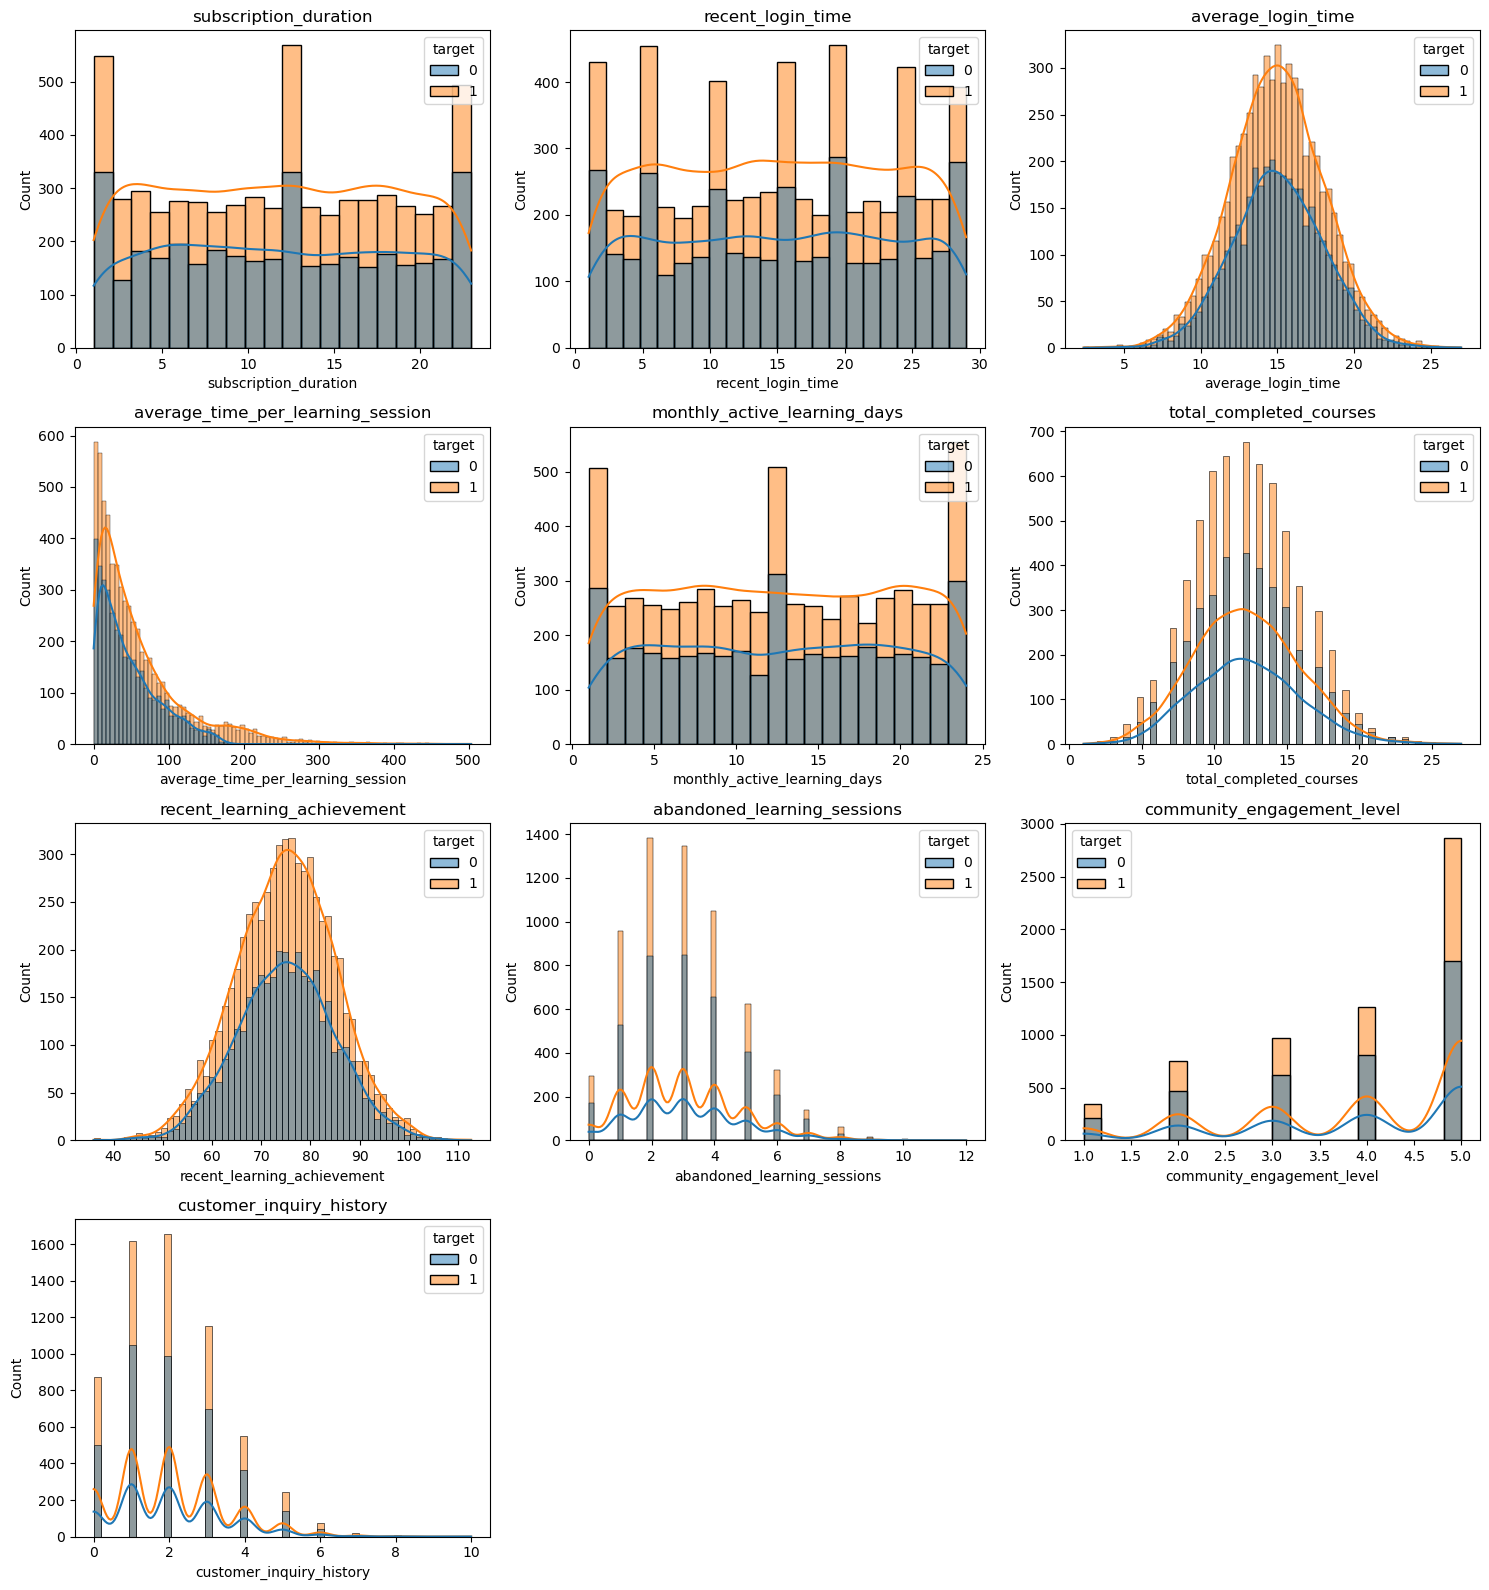

In [31]:
# 구독 여부별 수치형 변수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

# train.groupby('target')[numeric_train] # Q.  [numeric_train]의 의미가 무엇인가

fig,ax = plt.subplots(4,3, figsize = (15,16))
# plt.subtitle('Distributions of Nemeric Variables by Subscription Status',y=1.02)

# 수치형 변수와 구독 여부의 관계 시각화
numeric_columns = ['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','abandoned_learning_sessions','community_engagement_level','customer_inquiry_history']

# 각 수치형 변수에 대한 히스토그램 그리기
for i, column in enumerate(numeric_columns):
	row_index = i // 3
	col_index = i % 3

	sns.histplot(data=train, x = column, hue = train['target'], kde=True, ax=ax[row_index, col_index])
	ax[row_index,col_index].set_title(f'{column}')

# 불필요한 서브플롯 숨기기
for i in range(len(numeric_columns),12):
	row,col = i // 3, i % 3
	ax[row,col].axis("off")  # 생전 처음 보는 코드 등장

# 레이아웃 조정
plt.tight_layout()
plt.show()




In [ ]:
numeric_columns1 = ['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days']
numeric_columns2 = ['total_completed_courses','recent_learning_achievement','abandoned_learning_sessions','community_engagement_level','customer_inquiry_history']

In [23]:
# 구독 여부에 따른 요약 통계 계산
summary_stats1 = train.groupby('target')[numeric_columns1].agg(['mean','std','median'])
summary_stats2 = train.groupby('target')[numeric_columns2].agg(['mean','std','median'])
display(summary_stats1)
display(summary_stats2)

subscription_duration                  recent_login_time           \
                        mean       std median              mean      std   
target                                                                     
0                  11.953959  6.618295   12.0         15.057880  8.42873   
1                  11.862720  6.590500   12.0         14.985804  8.32231   

              average_login_time                       \
       median               mean       std     median   
target                                                  
0        15.0          15.026762  2.956732  14.979239   
1        15.0          14.974035  3.029275  14.979217   

       average_time_per_learning_session                        \
                                    mean        std     median   
target                                                           
0                              46.456986  39.639733  34.773346   
1                              60.105533  63.477523  39.705116   

       monthly_active_learning_days                   
                               mean       std median  
target                                                
0                         12.502236  6.854200   13.0  
1                         12.571866  6.980077   12.0

total_completed_courses                  recent_learning_achievement  \
                          mean       std median                        mean   
target                                                                        
0                    12.246251  3.630554   12.0                   75.000310   
1                    12.216003  3.636558   12.0                   75.047419   

                             abandoned_learning_sessions                   \
              std     median                        mean       std median   
target                                                                      
0        9.873574  74.981448                    3.087609  1.755430    3.0   
1       10.027058  75.199591                    3.016616  1.754416    3.0   

       community_engagement_level                  customer_inquiry_history  \
                             mean       std median                     mean   
target                                                                        
0                        3.870560  1.259105    4.0                 2.009997   
1                        3.895628  1.264061    4.0                 2.010808   

                         
             std median  
target                   
0       1.409145    2.0  
1       1.428306    2.0

### 칼럼의 구독자 그룹 간 통계적으로 유의미한 차이가 있는지 살펴보기

In [25]:
# H0 : 구독 여부 간에 칼럼의 평균이 같다.
from scipy.stats import ttest_ind

t_test_results = pd.DataFrame(index=numeric_columns,columns=['t_statistic','p_value'])

for column in numeric_columns:
    subscribed = train[train['target']==1][column]
    not_subscribed = train[train['target']==0][column]
    t_stat,p_value = ttest_ind(subscribed,not_subscribed)
    
    t_test_results.loc[column,'t_statistic'] = t_stat
    t_test_results.loc[column,'p_value'] = p_value
t_test_results

,t_statistic,p_value
subscription_duration,-0.670932,0.502279
recent_login_time,-0.418349,0.675701
average_login_time,-0.852596,0.393904
average_time_per_learning_session,11.908479,0.0
monthly_active_learning_days,0.487548,0.625881
total_completed_courses,-0.404012,0.686213
recent_learning_achievement,0.229379,0.818579
abandoned_learning_sessions,-1.963799,0.049581
community_engagement_level,0.964067,0.335035
customer_inquiry_history,0.027697,0.977905


#### 구독 여부별 범주형 변수 분포 확인

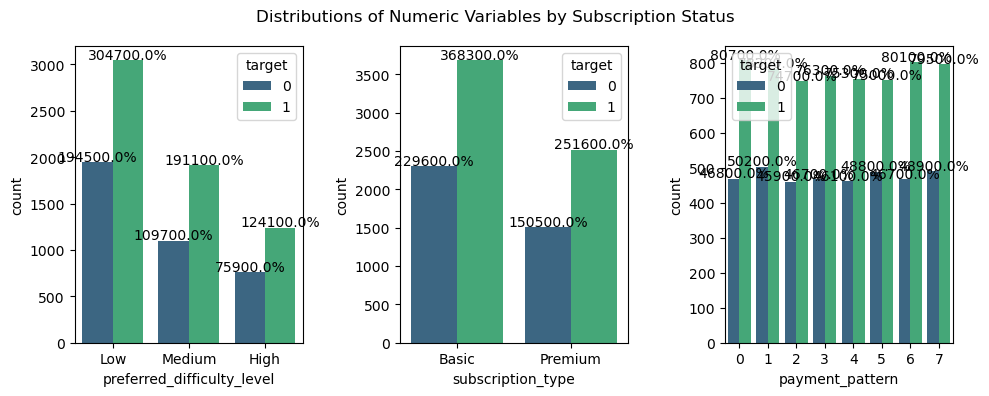

In [33]:
import numpy as np

fig,ax = plt.subplots(1,3,figsize=(10,4))
fig.suptitle('Distributions of Numeric Variables by Subscription Status')

category_columns = ['preferred_difficulty_level','subscription_type','payment_pattern']

# 각 범주형 변숭 대한 막대그래프 그리기
for i, column in enumerate(category_columns):
    sns.countplot(data=train,x=column,hue='target',palette='viridis',ax=ax[i])

    # 숫자 표현
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height():.1%}',(p.get_x() + p.get_width() / 2.,p.get_height()),ha='center',va = 'center',xytext = (0,4),textcoords = 'offset points')

    # for p in ax[i].patches:
    #     ax[i].annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')        

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 카이제곱검정

In [36]:
## 범주형 변수 간의 독립성 검정
## H0 : 구독여부와 각각의 범주형 변수는 연관성이 없다.

from scipy.stats import chi2_contingency

for column in category_columns:
    # 교차표
    cont_table = pd.crosstab(train[column],train['target'])
    
    # 카이제곱 수행
    chi2_stat,p_value,dof,expected =chi2_contingency(cont_table)
    
    print(column)
    print(f'Chi2 Statistic: {chi2_stat}')
    print(f'p_value:{p_value}')
    print(f'Degrees of Freedon: {dof}')
    print('Expected Frequencies Table:')
    print(expected)
    print('---'*10)

preferred_difficulty_level
Chi2 Statistic: 4.95445899120559
p_value:0.08397555825766137
Degrees of Freedon: 2
Expected Frequencies Table:
[[ 760.2    1239.8   ]
 [1897.4592 3094.5408]
 [1143.3408 1864.6592]]
------------------------------
subscription_type
Chi2 Statistic: 0.924292919153116
p_value:0.3363503107808859
Degrees of Freedon: 1
Expected Frequencies Table:
[[2272.6179 3706.3821]
 [1528.3821 2492.6179]]
------------------------------
payment_pattern
Chi2 Statistic: 3.3264772685914292
p_value:0.8532485616136666
Degrees of Freedon: 7
Expected Frequencies Table:
[[484.6275 790.3725]
 [488.4285 796.5715]
 [458.4006 747.5994]
 [467.523  762.477 ]
 [461.4414 752.5586]
 [470.5638 767.4362]
 [481.9668 786.0332]
 [488.0484 795.9516]]
------------------------------
